<div style="padding: 15px; border: 1px solid #e1e4e8; border-left: 5px solid #2980b9; border-radius: 5px; background-color: #f8f9fa;">
    <h2 style="color: #2980b9; margin-top: 0;">1. Data Acquisition</h2>
    <p>In this section, we connect to the <b>TradingView API</b> via <code>tvDatafeed</code> to fetch real-time financial data. Our goal is to analyze <b>Bitcoin (BTC/USD)</b> price action using daily candles from the <b>Bitstamp</b> exchange.</p>
    <ul style="list-style-type: none; padding-left: 0;">
        <li>🔹 <b>Asset:</b> Bitcoin (BTCUSD)</li>
        <li>🔹 <b>Interval:</b> Daily</li>
        <li>🔹 <b>Historical Depth:</b> 500 periods</li>
    </ul>
</div>

In [1]:
import numpy as np

In [ ]:
%pip install git+https://github.com/asimov-academy/Asimov_TV_connector.git

In [2]:
import pandas as pd
from tvDatafeed import TvDatafeed, Interval

tv = TvDatafeed()

bitcoin = tv.get_hist(symbol='BTCUSD', exchange='BITSTAMP', interval=Interval.in_daily, n_bars=500)


you are using nologin method, data you access may be limited


In [ ]:
bitcoin.head()

In [3]:
btc = bitcoin['close'].values
btc[:5]

array([58967., 57310., 59133., 57493., 57956.])

<div style="padding: 15px; border: 1px solid #e1e4e8; border-left: 5px solid #27ae60; border-radius: 5px; background-color: #f8f9fa;">
    <h2 style="color: #27ae60; margin-top: 0;">2. Trend Analysis and Technical Visualization</h2>
    <p>We process the raw data to identify market trends by calculating a <b>Moving Average (MA)</b> and using conditional formatting to enhance the chart's readability.</p>
    <hr style="border: 0; border-top: 1px solid #e1e4e8;">
    <h4 style="margin-bottom: 10px;">Key Visual Features:</h4>
    <ul style="line-height: 1.6;">
        <li><b>Custom Moving Average:</b> Dynamic function that calculates the average price over a variable period <code>p</code>.</li>
        <li><b>Bullish Sentiment:</b> <span style="color: #27ae60; font-weight: bold;">Green Line</span> indicates price trading <b>above</b> the Moving Average.</li>
        <li><b>Bearish Sentiment:</b> <span style="color: #c0392b; font-weight: bold;">Red Line</span> indicates price trading <b>below</b> the Moving Average.</li>
        <li><b>Data Continuity:</b> A subtle black background line (<code>alpha=0.3</code>) is maintained for context.</li>
    </ul>
</div>

In [4]:
#Building our moving_average function

def moving_average(my_array, n = 5):
    values = np.cumsum(my_array, dtype = float)
    values[n:] = values[n:] - values[:-n]
    return values[n - 1:]/ n

In [12]:
#Period of the moving_average
p = 27

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

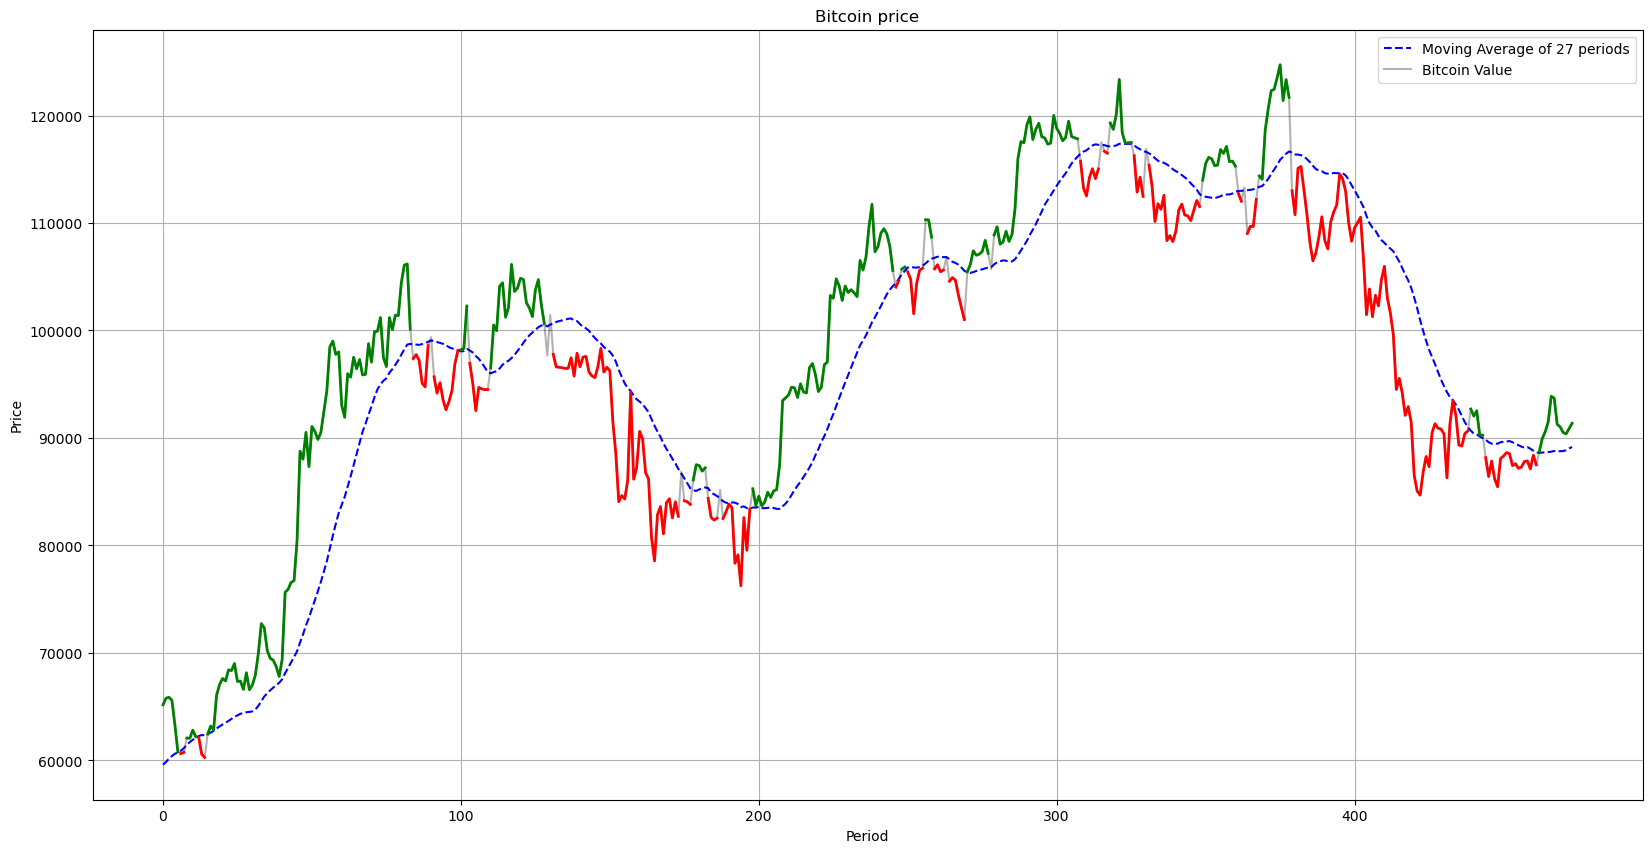

In [13]:
#Making a better complex chart

#Bitcoin moving average
mm_btc = moving_average(btc, p)

#Adjusting the chart size
plt.figure(figsize=(20,10))

#Attributes
#Moving average price
plt.plot(mm_btc
         , 'b--'
         , label = f'Moving Average of {p} periods')

#Bitcoin Price Plotting
btc_aligned = btc[(p-1):]
plt.plot(btc_aligned, color='black', label='Bitcoin Value', alpha=0.3)

#Conditional Plot - Changing color with conditions
btc_under_mm = np.ma.masked_where(mm_btc <= btc_aligned, btc_aligned) 
btc_above_mm = np.ma.masked_where(mm_btc > btc_aligned, btc_aligned)

plt.plot(btc_under_mm
         , 'r'
         , linewidth = 2)

plt.plot(btc_above_mm
         , 'g' 
         ,linewidth = 2)

#Configuration of exibition 
plt.title('Bitcoin price')
plt.xlabel('Period')
plt.ylabel('Price')
plt.grid()
plt.legend()